In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

import seaborn as sns

train = pd.read_csv('train.csv', engine='python')
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [2]:
# 일단 결측치를 모두 채운다
train = train.fillna(0)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      5000 non-null float64
겨울_구매건수      5000 non-null float64
봄_구매건수       5000 non-null float64
여름_구매건수      5000 non-null float64
아침_구매건수      5000 non-null float64
저녁_구매건수      5000 non-null float64
점심_구매건수      5000 non-null float64
주구매코너        5000 non-null object
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [4]:
# 주구매코너 One-Hot Encoding
train[['주구매코너']] = train[['주구매코너']].apply(lambda x: x.astype('category').cat.codes) 

### 앞서 모델링의 결과값이 60퍼센트가 채 되지않은것을 확인했다. 
### 가장 큰 요인중의 하나를 남,여의 비중이 크게 차이가 난다는것으로 보고
### 남녀를 각각 샘플링 해주어 비율을 맞춘다

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      5000 non-null float64
겨울_구매건수      5000 non-null float64
봄_구매건수       5000 non-null float64
여름_구매건수      5000 non-null float64
아침_구매건수      5000 non-null float64
저녁_구매건수      5000 non-null float64
점심_구매건수      5000 non-null float64
주구매코너        5000 non-null int8
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [14]:
# 이전에, 쓸모없다고 판단된 custid 를 
# 드랍한 나머지를 새로운 데이터프레임으로 생성
cp_train = train.drop(['custid'], axis=1)
cp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      5000 non-null float64
겨울_구매건수      5000 non-null float64
봄_구매건수       5000 non-null float64
여름_구매건수      5000 non-null float64
아침_구매건수      5000 non-null float64
저녁_구매건수      5000 non-null float64
점심_구매건수      5000 non-null float64
주구매코너        5000 non-null int8
dtypes: float64(10), int64(6), int8(1)
memory usage: 630.0 KB


In [17]:
# - gender 와 주구매코너 는 정규분포에 포함되면 안됨. 

gen_train = cp_train[['gender']]
gen_train

,gender
0,0
1,0
2,0
3,0
4,0
...,...
4995,1
4996,0
4997,1
4998,1


In [18]:
# 정규분포화를 위한 새로운 데이터프레임 생성
sd_train = cp_train.drop(['gender'], axis=1)
sd_train

,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,9.0,6.0,0.0,0.0,6.0,9.0,24
1,353450,9,39272,1.2,6,8,11.1,37.5,0.0,5.0,4.0,0.0,3.0,0.0,6.0,11
2,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,0.0,10.0,11.0,15.0,15
3,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,0.0,0.0,18.0,10.0,24
4,885000,5,177000,6.0,5,2,0.0,100.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,14
4996,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,0.0,14.0,5
4997,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,0.0,21.0,24
4998,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,0.0,2.0,11.0,22


In [20]:
#  Standard Scaling
# - 데이터를 통계적으로 표준 정규분포화

from sklearn.preprocessing import StandardScaler

sd_scal = StandardScaler()

sd_scal.fit(sd_train)   #   평균, 표준편차 값 찾기
sd_scal_data = sd_scal.transform(sd_train)
sd_scal_pd = pd.DataFrame(sd_scal_data, columns = sd_train.columns)

sd_scal_pd


,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,-0.526800,-0.487176,-0.723594,-0.295228,-0.573953,-0.415898,0.447095,2.506517,-0.753892,0.082645,-0.270974,-0.741704,-0.539937,-0.122416,-0.452992,1.430509
1,-0.591002,-0.636782,-0.800323,-0.979705,-0.779701,-0.519165,-0.353659,-0.043737,-0.753892,-0.298909,-0.444921,-0.741704,-0.277645,-0.636407,-0.566868,-0.759647
2,0.454209,0.036444,0.695154,1.210620,0.317619,-0.106097,-0.635976,-0.043737,-0.114071,0.845753,0.250866,-0.741704,0.334370,0.305911,-0.225239,-0.085753
3,-0.274458,-0.163030,-0.409962,-0.705914,-0.162458,-0.209364,1.093857,-0.406893,-0.296877,-0.012744,0.511786,-0.741704,-0.539937,0.905567,-0.415033,1.430509
4,-0.486529,-0.736519,0.941236,5.591269,-0.848284,-0.828967,-0.923426,2.506517,-0.753892,-0.775852,-0.357948,-0.741704,-0.539937,-0.208081,-0.794620,1.093562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.649793,1.457699,-0.390489,-0.158333,0.660532,1.081475,-0.369058,0.205168,0.434347,2.371969,0.424813,1.965485,0.159508,2.875868,0.875563,-0.254227
4996,-0.048806,-0.437308,1.017928,2.305782,-0.505371,-0.260997,0.585687,-0.002933,-0.388280,-0.203521,-0.270974,-0.659668,-0.277645,-0.636407,-0.263198,-1.770489
4997,0.489799,0.061378,0.703196,0.936829,-0.231041,0.152071,1.155453,-0.798612,0.342944,-0.203521,-0.270974,0.324764,0.858954,-0.636407,0.002513,1.430509
4998,-0.531832,-0.537045,-0.660293,0.799934,-0.505371,-0.570799,-0.528182,-0.990391,-0.205474,-0.394298,-0.618868,-0.659668,-0.539937,-0.465077,-0.377074,1.093562


In [21]:
# 각각 나뉘어진 데이터프레임을 다시 합치기
sd_train = pd.concat([gen_train, sd_train], axis=1)

In [22]:
sd_train

,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,9.0,6.0,0.0,0.0,6.0,9.0,24
1,0,353450,9,39272,1.2,6,8,11.1,37.5,0.0,5.0,4.0,0.0,3.0,0.0,6.0,11
2,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,0.0,10.0,11.0,15.0,15
3,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,0.0,0.0,18.0,10.0,24
4,0,885000,5,177000,6.0,5,2,0.0,100.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,14
4996,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,0.0,14.0,5
4997,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,0.0,21.0,24
4998,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,0.0,2.0,11.0,22


In [23]:
# 데이터 분할(Split data)
from sklearn.model_selection import train_test_split

dfX = sd_train.drop(['gender'], axis=1)
dfy = sd_train['gender']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)

display(X_train.shape, X_test.shape)

(3750, 16)

(1250, 16)

In [25]:
sd_train.gender.value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [26]:
y_train.value_counts()

0    2596
1    1154
Name: gender, dtype: int64

In [30]:
# 불균형한 데이터를 맞추기

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print("오버샘플링 이전 남성의 수 > {}".format(sum(y_train==1)))
print("오버샘플링 이전 여성의 수 > {}\n".format(sum(y_train==0)))

print("오버샘플링 이후 남성의 수 > {}".format(sum(y_train_res==1)))
print("오버샘플링 이후 여성의 수 > {}\n".format(sum(y_train_res==0)))

print("오버샘플링 이후 독립변수(X)의 수치 > {}".format(X_train_res.shape))
print("오버샘플링 이후 종속변수(y)의 수치 > {}".format(y_train_res.shape))

오버샘플링 이전 남성의 수 > 1154
오버샘플링 이전 여성의 수 > 2596

오버샘플링 이후 남성의 수 > 2596
오버샘플링 이후 여성의 수 > 2596

오버샘플링 이후 독립변수(X)의 수치 > (5192, 16)
오버샘플링 이후 종속변수(y)의 수치 > (5192,)


# [ 이만큼 했으니 또 닥치고 돌려봅시다 ]

In [32]:
from sklearn.tree import DecisionTreeClassifier
import mglearn

dt_model = DecisionTreeClassifier(random_state=0)

dt_model.fit(X_train_res, y_train_res)
display(dt_model.score(X_train_res, y_train_res))
display(dt_model.score(X_test, y_test))

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


0.9998073959938367

0.5944

#### 결과
 - 샘플링 이후 약 1퍼센트가량이 증가한것을 알 수 있다.
 - 유효한 컬럼이 현저히 적다는 이야기. 
 - 따라서 새로운 컬럼을 생성해주도록 하자
 

## 새로운 컬럼의 생성

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      5000 non-null float64
겨울_구매건수      5000 non-null float64
봄_구매건수       5000 non-null float64
여름_구매건수      5000 non-null float64
아침_구매건수      5000 non-null float64
저녁_구매건수      5000 non-null float64
점심_구매건수      5000 non-null float64
주구매코너        5000 non-null int8
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [38]:
# gender 와의 상관계수를 확인
pd.DataFrame(abs(train.corr()['gender']).sort_values(ascending = False))

,gender
gender,1.000000
custid,0.262472
아침_구매건수,0.127779
여름_구매건수,0.101900
총구매액,0.099137
점심_구매건수,0.097237
구매건수,0.094022
가을_구매건수,0.088600
내점일수,0.084255
구매브랜드종류,0.083988


### - 전반적으로 낮은 상관계수
### - 유효한 상관계수를 지닌 컬럼을 찾아,  
### - 새로운 컬럼의 생성

In [44]:
pd.DataFrame(abs(train.corr()['아침_구매건수']).sort_values(ascending = False))

,아침_구매건수
아침_구매건수,1.000000
구매건수,0.672721
내점일수,0.638138
봄_구매건수,0.615851
가을_구매건수,0.607713
여름_구매건수,0.587149
구매브랜드종류,0.582657
겨울_구매건수,0.581196
점심_구매건수,0.526168
총구매액,0.456158


In [45]:
pd.DataFrame(abs(train.corr()['구매건수']).sort_values(ascending = False))

,구매건수
구매건수,1.000000
점심_구매건수,0.945027
내점일수,0.942115
가을_구매건수,0.896969
봄_구매건수,0.895580
여름_구매건수,0.883784
겨울_구매건수,0.879652
구매브랜드종류,0.869075
총구매액,0.712183
아침_구매건수,0.672721


## 구매건수가 높은 상관도를 보임
## 이를 기준으로 새로운 컬럼을 만들자

In [48]:
train['아침구매액'] = np.round(train['총구매액']*(train['아침_구매건수'] /train['구매건수'] ), 3)
train['점심구매액'] = np.round(train['총구매액']*(train['점심_구매건수'] /train['구매건수'] ), 3)
train['저녁구매액'] = np.round(train['총구매액']*(train['저녁_구매건수'] /train['구매건수'] ), 3)  
train['봄구매액']   = np.round(train['총구매액']*(train['봄_구매건수'] /train['구매건수'] ), 3) 
train['여름구매액'] = np.round(train['총구매액']*(train['여름_구매건수'] /train['구매건수'] ), 3) 
train['가을구매액'] = np.round(train['총구매액']*(train['가을_구매건수'] /train['구매건수'] ), 3)  
train['겨울구매액'] = np.round(train['총구매액']*(train['겨울_구매건수'] /train['구매건수'] ), 3) 
train['구매브랜드가치'] = np.round(train['구매브랜드종류']*(train['총구매액']/train['구매건수']), 3)


In [50]:
pd.DataFrame(abs(train.corr()['gender']).sort_values(ascending = False))

,gender
gender,1.000000
custid,0.262472
아침_구매건수,0.127779
아침구매액,0.120622
여름구매액,0.102140
여름_구매건수,0.101900
구매브랜드가치,0.100906
총구매액,0.099137
점심_구매건수,0.097237
가을구매액,0.095573


Text(0.5, 1.0, '아침_구매액 vs gender')

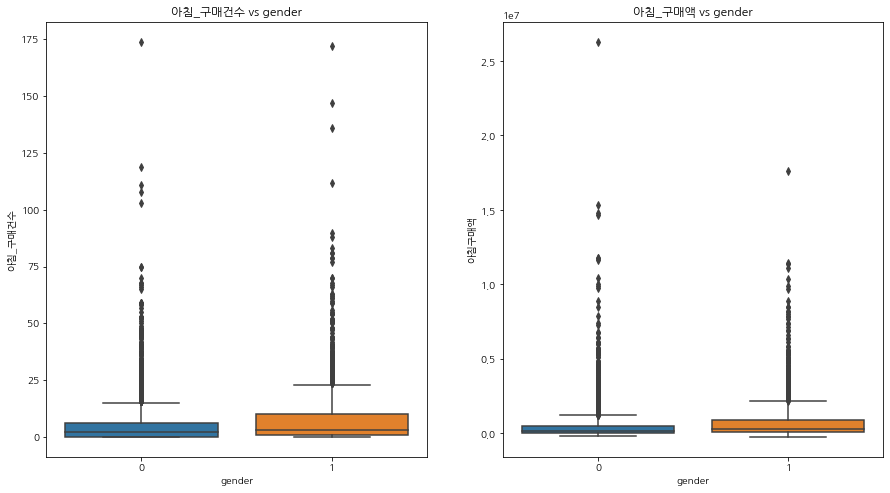

In [59]:
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x='gender', y='아침_구매건수', data=train, ax=axes[0])
axes[0].set_title("아침_구매건수 vs gender")

sns.boxplot(x='gender', y='아침구매액', data=train, ax=axes[1])
axes[1].set_title("아침_구매액 vs gender")

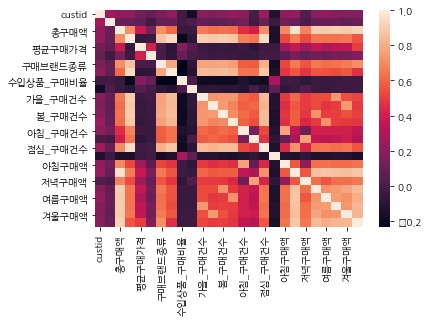

In [62]:
sns.heatmap(train.corr(), annot=False)

### Gender 를 구분해내기엔 잘 정제된 데이터라고는 전혀 볼 수 없음. 
### 그래도 별수없음. 돌려봐야함. 
### 그나마 연관관계가 높은 것을 기준으로 돌려보자

In [64]:
pd.DataFrame(abs(train.corr()['gender']).sort_values(ascending = False))

,gender
gender,1.000000
custid,0.262472
아침_구매건수,0.127779
아침구매액,0.120622
여름구매액,0.102140
여름_구매건수,0.101900
구매브랜드가치,0.100906
총구매액,0.099137
점심_구매건수,0.097237
가을구매액,0.095573


In [76]:
dataPT = train.copy()
dataPD = train.drop(['저녁구매액', '평균할부개월수', '주말방문비율', 
                    '수입상품_구매비율', '저녁_구매건수', '주구매코너'], axis=1)

dfy = dataPD['gender']
dfX = dataPD.drop('gender', axis=1)
dfX.tail(2)

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,점심_구매건수,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,구매브랜드가치
4998,49975,654498,13,50346,10,7,6.0,4.0,2.0,1.0,0.0,11.0,0.00,553806.000,100692.000,50346.000,302076.000,201384.000,503460.000
4999,49993,2554723,32,79835,9,26,6.0,5.0,10.0,11.0,8.0,19.0,638680.75,1516866.781,798350.938,878186.031,479010.562,399175.469,718515.844


In [77]:
def drawSMOTETomek(X_org, y_org, X_pca, y_resampled, title1, title2, xlim, ylim, xticks, yticks):
    # Two subplots, unpack the axes array immediately
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(18,8))

    c0 = ax1.scatter(X_org[y_org == 0, 0], X_org[y_org == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax1.scatter(X_org[y_org == 1, 0], X_org[y_org == 1, 1], label="Class #1", alpha=0.5)
    ax1.set_title(title1)

    ax2.scatter(X_pca[y_resampled == 0, 0], X_pca[y_resampled == 0, 1], label="Class #0", alpha=0.5)
    ax2.scatter(X_pca[y_resampled == 1, 0], X_pca[y_resampled == 1, 1], label="Class #1", alpha=0.5)
    ax2.set_title(title2)

    # make nice plotting
    for ax in (ax1, ax2):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.spines['left'].set_position(('outward', 10))
        ax.spines['bottom'].set_position(('outward', 10))
        ax.set_xlim(xlim)      # [-1, 10]
        ax.set_ylim(ylim)      # [-5, 20]
        ax.set_xticks(xticks)  # range(-1, 10)
        ax.set_yticks(yticks)  # range(-5, 20)

    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center', ncol=2, labelspacing=0.)
    plt.tight_layout(pad=3)
    plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


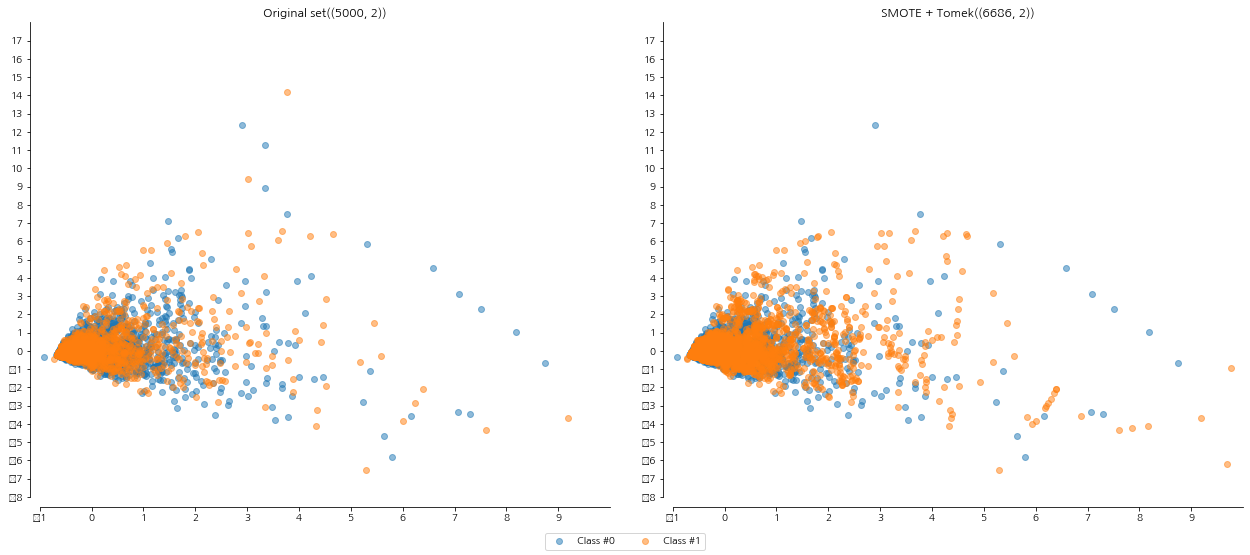

(5000, 19) (6686, 19) (5014, 19) (1672, 19)


In [78]:
from imblearn.combine import *
from sklearn.decomposition import PCA

# PCA로 feature 2개만 선택하여 Scatter로 시각화해 봄..
pca = PCA(n_components=2)
X_org = pca.fit_transform(dfX)
y_org = np.array(dfy)
X_resampled, y_resampled = SMOTETomek(random_state=0).fit_sample(dfX, dfy)
X_pca = pca.transform(X_resampled)

scaler = StandardScaler()
X_org_scaled = scaler.fit_transform(X_org)
X_pca_scaled = scaler.transform(X_pca)

title1 = 'Original set('+ str(X_org_scaled.shape) +')'
title2 = 'SMOTE + Tomek('+ str(X_pca_scaled.shape) +')'
xlim = [-1, 10]
ylim = [-8, 18]
xticks = range(-1, 10)
yticks = range(-8, 18)

# Scatter 그래프 그리기
drawSMOTETomek(X_org_scaled, y_org, X_pca_scaled, y_resampled, title1, title2, xlim, ylim, xticks, yticks)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)
print(dfX.shape, X_resampled.shape, X_train.shape, X_test.shape)

In [79]:
# 불균형한 데이터를 맞추기


X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)

display(X_train.shape, X_test.shape)

sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print("오버샘플링 이전 남성의 수 > {}".format(sum(y_train==1)))
print("오버샘플링 이전 여성의 수 > {}\n".format(sum(y_train==0)))

print("오버샘플링 이후 남성의 수 > {}".format(sum(y_train_res==1)))
print("오버샘플링 이후 여성의 수 > {}\n".format(sum(y_train_res==0)))

print("오버샘플링 이후 독립변수(X)의 수치 > {}".format(X_train_res.shape))
print("오버샘플링 이후 종속변수(y)의 수치 > {}".format(y_train_res.shape))

(3750, 19)

(1250, 19)

오버샘플링 이전 남성의 수 > 1154
오버샘플링 이전 여성의 수 > 2596

오버샘플링 이후 남성의 수 > 2596
오버샘플링 이후 여성의 수 > 2596

오버샘플링 이후 독립변수(X)의 수치 > (5192, 19)
오버샘플링 이후 종속변수(y)의 수치 > (5192,)


# 또 돌려

In [81]:
dt_model = DecisionTreeClassifier(random_state=0)

dt_model.fit(X_train_res, y_train_res)
display(dt_model.score(X_train_res, y_train_res))
display(dt_model.score(X_test, y_test))

1.0

0.5904